In [10]:
# Load data interactively using lib.DataUitzoekenGui
directory1 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
directory2 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"

# Load datasets
print("Loading Dataset 1...")
result1 = lib.DataUitzoekenGui(directory1)
print("Loading Dataset 2...")
result2 = lib.DataUitzoekenGui(directory2)


Loading Dataset 1...


SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

Loading Dataset 2...


SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [23]:
# After loading the files and clicking the load button
# Check if 'merged_df' exists in results
if 'merged_df' in result1 and 'merged_df' in result2:
    merged_df1 = result1['merged_df'].copy()
    merged_df2 = result2['merged_df'].copy()

    # Process Dataset 1
    df1 = merged_df1.copy()
    df1 = df1[df1['1_Tijd'] > 155000]
    df1 = df1[df1['1_Tijd'] < 190000]
    #df1 = df1[df1['1_Snelheid over de grond in km/h'] != 0]
    #df1 = df1[df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] != 0]
    df1 = df1[df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]

    # Process Dataset 2
    df2 = merged_df2.copy()
    def hhmmss_to_seconds(hhmmss):
        hours = hhmmss // 10000
        minutes = (hhmmss % 10000) // 100
        seconds = hhmmss % 100
        return hours * 3600 + minutes * 60 + seconds

    df2['Time_in_seconds'] = df2['1_Tijd'].apply(hhmmss_to_seconds)
    df2 = df2[df2['Time_in_seconds'] > 36750]
    df2 = df2[df2['Time_in_seconds'] < 38000]

    print("Both datasets have been processed successfully!")
else:
    print("One or both datasets have not been loaded.")


Both datasets have been processed successfully!


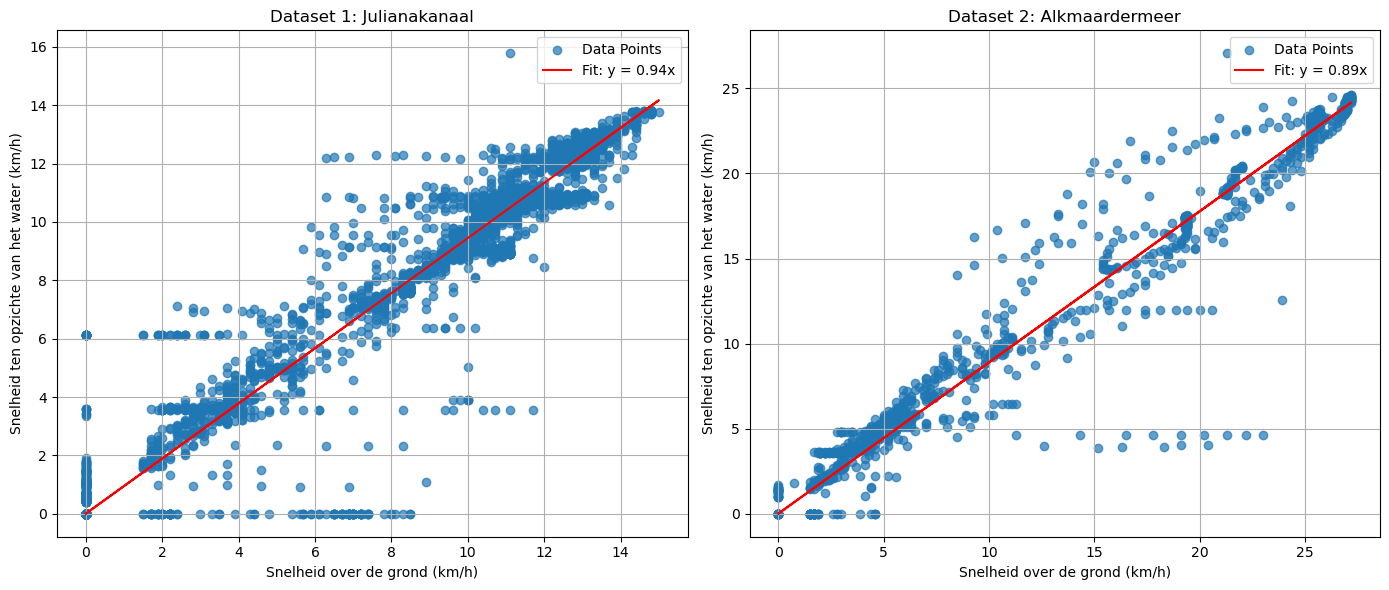

ValueError: operands could not be broadcast together with shapes (11323,) (1210,) 

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Helper functions
def linear_model_through_origin(x, m):
    """Linear model through origin."""
    return m * x

def calculate_linear_fit(x, y):
    """Calculate linear fit through the origin."""
    popt, _ = curve_fit(linear_model_through_origin, x, y)
    return popt[0]  # Slope (m)

def plot_speeds(ax, x, y, title):
    """Plot speed over ground vs. speed relative to water."""
    if len(x) > 1:
        slope = calculate_linear_fit(x, y)
        y_fit = linear_model_through_origin(x, slope)
        ax.scatter(x, y, label='Data Points', alpha=0.7)
        ax.plot(x, y_fit, color='red', label=f'Fit: y = {slope:.2f}x')
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (km/h)')
        ax.set_ylabel('Snelheid ten opzichte van het water (km/h)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)

def plot_scaled_data(x, y, title):
    """Plot scaled data with linear fit."""
    if len(x) > 1:
        original_slope = calculate_linear_fit(x, y)
        y_scaled = y / original_slope
        scaled_slope = calculate_linear_fit(x, y_scaled)
        y_fit_scaled = linear_model_through_origin(x, scaled_slope)
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y_scaled, label='Scaled Data Points', alpha=0.7)
        plt.plot(x, y_fit_scaled, color='blue', label=f'Fit (Scaled): y = {scaled_slope:.2f}x')
        plt.title(title)
        plt.xlabel('Snelheid over de grond (km/h)')
        plt.ylabel('Snelheid ten opzichte van het water (scaled)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Extract data for plotting
x1, y1 = df1['1_Snelheid over de grond in km/h'], df1['1_Snelheid tenopzichte van het water in Kilometers per uur']
x2, y2 = df2['1_Snelheid over de grond in km/h'], df2['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_speeds(axes[0], x1, y1, 'Dataset 1: Julianakanaal')
plot_speeds(axes[1], x2, y2, 'Dataset 2: Alkmaardermeer')
plt.tight_layout()
plt.show()

# Plot scaled data for Dataset 2
plot_scaled_data(x1, y2, 'Dataset 1: Scaled Data')
plot_scaled_data(x2, y2, 'Dataset 2: Scaled Data')
